# Mereproduksi Hasil pada Paper Ashhab-Nori
Parameter:
* $\omega$: frekuensi transisi atom
* $\omega_0$: frekuensi medan
* $\hbar=1$

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from jc_model.Hamiltonian import Hamiltonian
from jc_model.op_collapse import op_collapse
import matplotlib as mpl
%matplotlib inline

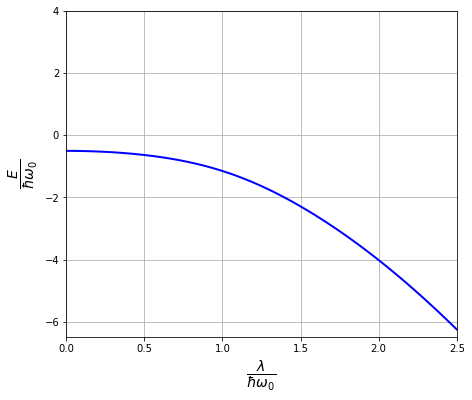

In [3]:
wc = 2*np.pi     #frekuensi medan
wa = 2*np.pi     #frekuensi atom
N = 15               #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 2.5, 101)*2*np.pi # Kuat interaksi

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

psi_list = []
E_list = []

# Keadaan
#na = sm.dag()*sm  # atom
#nc = a.dag()*a    # medan

for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    
    # menghitung ground state & energinya
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)
    E_list.append(gnd_energy/(2*np.pi))

#na_expt = expect(na, psi_list) # probabilitas okupasi atom
#nc_expt = expect(nc, psi_list) # probabilitas okupasi medan

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))

axes.plot(g_list/(2*np.pi), E_list, 'b', linewidth=2)
axes.set(xlim=(0, 2.5), ylim=(-6.5, 4))
axes.set_ylabel(r"$\frac{E}{\hbar\omega_{0}}$", fontsize=20)
axes.set_xlabel(r"$\frac{\lambda}{\hbar\omega_{0}}$", fontsize=20)
axes.grid()
#plt.savefig('Plot_energi_kuat interaksi.pdf')


Plot dari paper utama, dengan line biru sebagai keadaan dasar:

<img src="paper_plot_energi.png" width="400"/>

## Plot Wigner function sebagai fungsi kuat interaksi $\lambda$

$\frac{\lambda}{\hbar\omega_0} = 0.5, 2.0, 2.5, 3.5$

$\omega = 10 \omega_0$

In [3]:
g_list = np.array([0.5, 2.0, 2.5, 3.5])*2*np.pi
len(g_list)

4

In [4]:
wc = 2*np.pi     #frekuensi medan
wa = 10*wc     #frekuensi atom
psi_list = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)

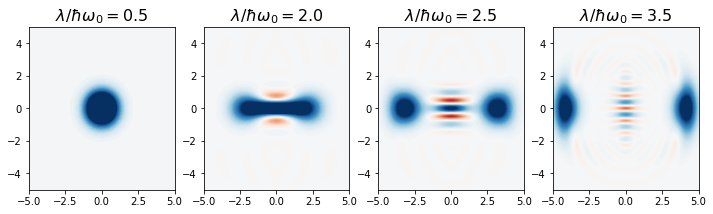

In [6]:
xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(2*np.pi)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    #plt.savefig('Plot_wigner_kuat interaksi.pdf')

Plot dari paper utama:

<img src="paper_plot_w1.png" width="150"/> 
<img src="paper_plot_w2.png" width="150"/>
<img src="paper_plot_w3.png" width="150"/>
<img src="paper_plot_w4.png" width="150"/>

## Plot entropi sebagai fungsi kuat interaksi $\lambda$


* $\omega = 10 \omega_0$ dan nilai $\lambda$ dari 0 s/d 5

In [7]:
g_list = np.linspace(0, 5, 301)*2*np.pi # Kuat interaksi
wc = 2*np.pi     #frekuensi medan
wa = 10*wc     #frekuensi atom
psi_list = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)

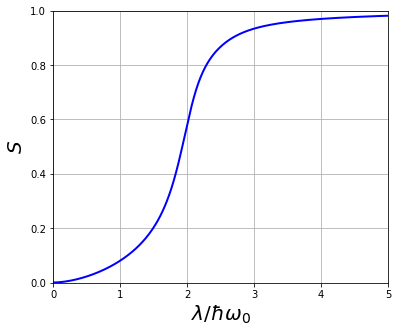

In [8]:
entropy = np.zeros(shape(g_list))

for idx, psi in enumerate(psi_list):
    # menghitung matriks densitas
    rhoo = ptrace(psi, 1)
    # menghitung entropy atom
    entropy[idx]   = entropy_vn(rhoo, 2)
    
fig, axes = plt.subplots(1, 1, figsize=(6,5))
axes.plot(g_list/(2*np.pi), entropy, 'b', linewidth=2)
axes.set_ylabel(r"$S$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_0$", fontsize=20)
axes.set(xlim=(0, 5), ylim=(0, 1))
axes.grid()
plt.savefig('Plot_entropi_kuat interaksi.pdf')

Plot dari paper utama, dengan line biru ketika $\epsilon=0$:

<img src="plot_entropi_1.png" width="400"/> 

* $\omega = \omega_0$ dan nilai $\lambda$ dari 0 s/d 2.5


In [9]:
wc = 2*np.pi     #frekuensi medan
wa = wc     #frekuensi atom
g_list = np.linspace(0, 2.5, 101)*2*np.pi # Kuat interaksi
psi_list = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)

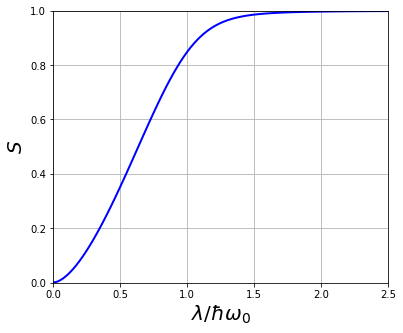

In [10]:
entropy = np.zeros(shape(g_list))

for idx, psi in enumerate(psi_list):
    # menghitung matriks densitas
    rhoo = ptrace(psi, 1)
    # menghitung entropy atom
    entropy[idx]   = entropy_vn(rhoo, 2)
    
fig, axes = plt.subplots(1, 1, figsize=(6,5))
axes.plot(g_list/(2*np.pi), entropy, 'b', linewidth=2)
axes.set_ylabel(r"$S$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_0$", fontsize=20)
axes.set(xlim=(0, 2.5), ylim=(0, 1))
axes.grid()

Plot dari paper utama, dengan line biru ketika $\epsilon=0$:

<img src="plot_entropi_2.png" width="400"/> 

* $\omega = \frac{\omega_0}{10}$ dan nilai $\lambda$ dari 0 s/d 2.5

In [11]:
wc = 2*np.pi     #frekuensi medan
wa = wc/10     #frekuensi atom
g_list = np.linspace(0, 2.5, 101)*2*np.pi # Kuat interaksi
psi_list = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)

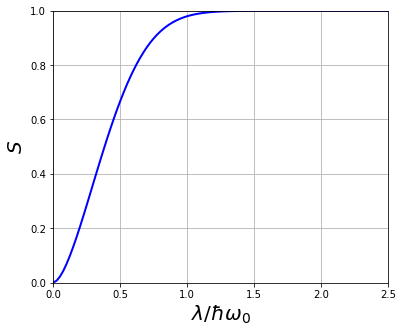

In [12]:
entropy = np.zeros(shape(g_list))

for idx, psi in enumerate(psi_list):
    # menghitung matriks densitas
    rhoo = ptrace(psi, 1)
    # menghitung entropy atom
    entropy[idx]   = entropy_vn(rhoo, 2)
    
fig, axes = plt.subplots(1, 1, figsize=(6,5))
axes.plot(g_list/(2*np.pi), entropy, 'b', linewidth=2)
axes.set_ylabel(r"$S$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_0$", fontsize=20)
axes.set(xlim=(0, 2.5), ylim=(0, 1.0))
axes.grid()

Plot dari paper utama, dengan line biru ketika $\epsilon=0$:

<img src="plot_entropi_3.png" width="400"/> 